# Gradient Boosting Classifier
Gradient boosting classifiers are a group of machine learning algorithms that combine many weak learning models together to create a strong predictive model.

Why do we need?
Gradient boosting models are becoming popular because of their effectiveness at classifying complex datasets, and have recently been used to win many Kaggle data science competitions.

This is a baseline notebook and it uploads the dataset with one hot encoding and shows overfitting of the model.

In [50]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report, confusion_matrix
from pprint import pprint
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2, f_regression
from sklearn.datasets import load_boston
from sklearn.datasets import load_iris
from numpy import array 
from sklearn.preprocessing import StandardScaler,MinMaxScaler
from sklearn.pipeline import make_pipeline
from sklearn import svm
from sklearn.decomposition import PCA
from sklearn.tree import DecisionTreeRegressor 
from sklearn.pipeline import make_pipeline
from sklearn.datasets import make_friedman1
from sklearn.feature_selection import RFE
import matplotlib.pyplot as plt
from sklearn.model_selection import StratifiedKFold
from sklearn.feature_selection import RFECV
from sklearn.datasets import make_classification
from sklearn import metrics
# check accuracy score
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import f1_score
df = pd.DataFrame()

In [51]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [52]:
%cd /content/drive/MyDrive/
dataset = pd.read_csv('cleaned_dataset_label_encoding.csv')
dataset["attack_cat"]
dataset.drop("attack_cat",axis=1)


/content/drive/MyDrive


,dur,proto,service,state,spkts,dpkts,sbytes,dbytes,rate,sttl,dttl,sload,dload,sloss,dloss,sinpkt,dinpkt,sjit,djit,swin,stcpb,dtcpb,dwin,tcprtt,synack,ackdat,smean,dmean,trans_depth,response_body_len,ct_srv_src,ct_state_ttl,ct_dst_ltm,ct_src_dport_ltm,ct_dst_sport_ltm,ct_dst_src_ltm,is_ftp_login,ct_ftp_cmd,ct_flw_http_mthd,ct_src_ltm,ct_srv_dst,is_sm_ips_ports,label
0,0.000011,119,0,5,2,0,496,0,90909.090200,254,0,1.803636e+08,0.000000,0,0,0.011000,0.00000,0.000000,0.000000,0,0,0,0,0.00000,0.000000,0.000000,248,0,0,0,2,2,1,1,1,2,0,0,0,1,2,0,0
1,0.000008,119,0,5,2,0,1762,0,125000.000300,254,0,8.810000e+08,0.000000,0,0,0.008000,0.00000,0.000000,0.000000,0,0,0,0,0.00000,0.000000,0.000000,881,0,0,0,2,2,1,1,1,2,0,0,0,1,2,0,0
2,0.000005,119,0,5,2,0,1068,0,200000.005100,254,0,8.544000e+08,0.000000,0,0,0.005000,0.00000,0.000000,0.000000,0,0,0,0,0.00000,0.000000,0.000000,534,0,0,0,3,2,1,1,1,3,0,0,0,1,3,0,0
3,0.000006,119,0,5,2,0,900,0,166666.660800,254,0,6.000000e+08,0.000000,0,0,0.006000,0.00000,0.000000,0.000000,0,0,0,0,0.00000,0.000000,0.000000,450,0,0,0,3,2,2,2,1,3,0,0,0,2,3,0,0
4,0.000010,119,0,5,2,0,2126,0,100000.002500,254,0,8.504000e+08,0.000000,0,0,0.010000,0.00000,0.000000,0.000000,0,0,0,0,0.00000,0.000000,0.000000,1063,0,0,0,3,2,2,2,1,3,0,0,0,2,3,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
257668,0.000009,119,2,5,2,0,114,0,111111.107200,254,0,5.066666e+07,0.000000,0,0,0.009000,0.00000,0.000000,0.000000,0,0,0,0,0.00000,0.000000,0.000000,57,0,0,0,24,2,24,24,13,24,0,0,0,24,24,0,1
257669,0.505762,113,0,4,10,8,620,354,33.612649,254,252,8.826286e+03,4903.492188,2,1,54.400111,66.98057,3721.068786,120.177727,255,3518776216,3453092386,255,0.09944,0.036895,0.062545,62,44,0,0,1,1,1,1,1,2,0,0,0,1,1,0,1
257670,0.000009,119,2,5,2,0,114,0,111111.107200,254,0,5.066666e+07,0.000000,0,0,0.009000,0.00000,0.000000,0.000000,0,0,0,0,0.00000,0.000000,0.000000,57,0,0,0,12,2,3,3,3,13,0,0,0,3,12,0,1
257671,0.000009,119,2,5,2,0,114,0,111111.107200,254,0,5.066666e+07,0.000000,0,0,0.009000,0.00000,0.000000,0.000000,0,0,0,0,0.00000,0.000000,0.000000,57,0,0,0,30,2,30,30,14,30,0,0,0,30,30,0,1


In [53]:
acc1 = []
f1 = []
acc = []

In [54]:
def get_data(filename):
    return pd.read_csv(filename)

In [55]:
def prep_training(dataframe):
    return train_test_split(dataframe, train_size=0.8, test_size=0.2, random_state=42)

In [56]:
def training_set(dataframe):
  return train_test_split(dataframe, train_size=0.8, test_size=0.2, random_state=42)

In [57]:
def creatingParamterGrid():
    n_estimators = [20,81,10]
    # learning_rate= [0.15,0.1,0.05,0.01,0.005,0.001],
    # min_samples_split = [2,4,6]
    
    # Create the parameter grid
    parameter_grid = {'n_estimators': n_estimators}
              #  'learning_rate': learning_rate}
    return parameter_grid

In [58]:
def prepToFindOptimalHyperParams(clf,parameter_grid):
    grid_search = GridSearchCV(estimator=clf, cv=5, param_grid = parameter_grid)
    return grid_search

In [59]:
def train(cross_val_df,grid_search):
    grid_search.fit(cross_val_df.drop("label",axis=1), cross_val_df["label"])
    Xpred = grid_search.predict(cross_val_df.drop("label",axis=1))
    print("accuracy on train is",accuracy_score(cross_val_df["label"],Xpred))

In [60]:
def testGradientBoost(test_df,grid_search,type):
    Ytest = test_df["label"]
    Ypred = grid_search.predict(test_df.drop("label",axis=1))
    acc=accuracy_score(Ytest,Ypred)
    acc1.append(accuracy_score(Ytest,Ypred))
    f1.append(f1_score(Ytest,Ypred))
    print('Accuracy of Gradient Boost: {:.4f}'.format(acc))  
    print(classification_report(Ytest,Ypred))
    plt.savefig('confusion_matrix'+type+'.jpg')
    cm = confusion_matrix(Ytest, Ypred)
    ax= plt.subplot()
    sns.heatmap(cm, annot=True, fmt='g', ax=ax) 
    print(cm)
    return acc1

    

In [61]:
def main(dataframe,type): 
    clf = GradientBoostingClassifier(learning_rate=0.5, max_depth=3)
    cross_val_df, test_df = prep_training(dataframe)
    parameter_grid = creatingParamterGrid()
    pprint(parameter_grid)
    grid_search = prepToFindOptimalHyperParams(clf,parameter_grid)
    train(cross_val_df,grid_search)
    testGradientBoost(test_df,grid_search,type)
    print(grid_search.best_params_)
    print(grid_search.best_score_)
    return grid_search

In [62]:
dataframe = get_data('cleaned_dataset_label_encoding.csv')

{'n_estimators': [20, 81, 10]}
accuracy on train is 0.9429605409968079
Accuracy of Gradient Boost: 0.9422
              precision    recall  f1-score   support

           0       0.92      0.92      0.92     18675
           1       0.96      0.95      0.95     32860

    accuracy                           0.94     51535
   macro avg       0.94      0.94      0.94     51535
weighted avg       0.94      0.94      0.94     51535

[[17248  1427]
 [ 1550 31310]]
{'n_estimators': 81}
0.9400304598189171


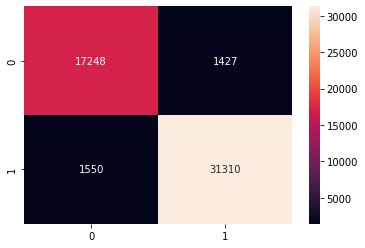

In [63]:
dataframe = dataframe.drop("attack_cat",axis=1)
grid_search = main(dataframe,"withoutpreprocess")

In [64]:
pd.DataFrame(grid_search.cv_results_).head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_n_estimators,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
0,18.878314,0.041539,0.040695,0.002454,20,{'n_estimators': 20},0.933419,0.931600,0.933904,0.931550,0.930846,0.932264,0.001182,2
1,75.943908,0.921974,0.074534,0.004935,81,{'n_estimators': 81},0.941569,0.938901,0.940696,0.939675,0.939312,0.940030,0.000972,1
2,9.387107,0.152471,0.034549,0.001686,10,{'n_estimators': 10},0.927840,0.926943,0.925948,0.925850,0.927256,0.926768,0.000766,3


In [65]:
df['Accuracy_without_pp'] =acc1
df['F1_score_without_pp']=f1

In [66]:
dataframe1 = get_data('dataset_minmax.csv')

{'n_estimators': [20, 81, 10]}
accuracy on train is 0.9424075134133445
Accuracy of Gradient Boost: 0.9415
              precision    recall  f1-score   support

           0       0.92      0.92      0.92     18675
           1       0.95      0.95      0.95     32860

    accuracy                           0.94     51535
   macro avg       0.94      0.94      0.94     51535
weighted avg       0.94      0.94      0.94     51535

[[17185  1490]
 [ 1527 31333]]
{'n_estimators': 81}
0.9404961699169713


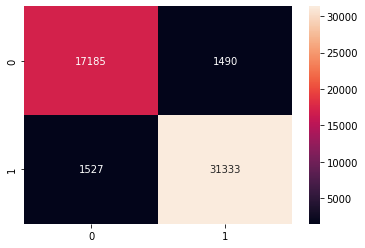

In [67]:
grid_search1 = main(dataframe1,"MinMax")

In [68]:
pd.DataFrame(grid_search1.cv_results_).head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_n_estimators,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
0,18.389382,0.221442,0.039047,0.003228,20,{'n_estimators': 20},0.933807,0.930630,0.932619,0.931259,0.932156,0.932094,0.001101,2
1,74.260875,0.438371,0.071481,0.004457,81,{'n_estimators': 81},0.941569,0.940211,0.940235,0.940621,0.939845,0.940496,0.000590,1
2,9.074374,0.058366,0.029031,0.000765,10,{'n_estimators': 10},0.927865,0.923693,0.925512,0.924370,0.928008,0.925889,0.001770,3


In [69]:
df['Accuracy_minmax'] =acc1[1]
df['F1_score_minmax']=f1[1]

In [70]:
dataframe2 = get_data('dataset_minmax_corr.csv')

{'n_estimators': [20, 81, 10]}
accuracy on train is 0.9350483656579572
Accuracy of Gradient Boost: 0.9335
              precision    recall  f1-score   support

           0       0.91      0.90      0.91     18675
           1       0.95      0.95      0.95     32860

    accuracy                           0.93     51535
   macro avg       0.93      0.93      0.93     51535
weighted avg       0.93      0.93      0.93     51535

[[16878  1797]
 [ 1630 31230]]
{'n_estimators': 81}
0.9328023020460359


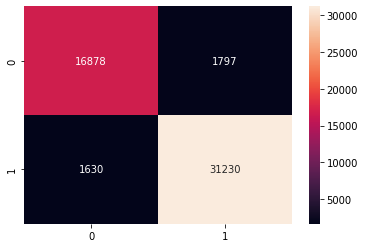

In [71]:
grid_search2 = main(dataframe2,"MinMaxCorr")

In [72]:
pd.DataFrame(grid_search2.cv_results_).head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_n_estimators,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
0,15.477937,0.054182,0.031966,0.001732,20,{'n_estimators': 20},0.925924,0.924105,0.923377,0.923812,0.924831,0.924410,0.000893,2
1,62.701657,0.571762,0.060371,0.001645,81,{'n_estimators': 81},0.932691,0.931527,0.933249,0.932399,0.934145,0.932802,0.000872,1
2,7.777727,0.011676,0.027141,0.001692,10,{'n_estimators': 10},0.912099,0.917095,0.913045,0.916705,0.913285,0.914446,0.002047,3


In [73]:
df['Accuracy_minmaxcorr'] =acc1[2]
df['F1_score_minmaxcorr']=f1[2]

In [74]:
dataframe3 = get_data('dataset_pca.csv')

{'n_estimators': [20, 81, 10]}
accuracy on train is 0.9202427500024256
Accuracy of Gradient Boost: 0.9168
              precision    recall  f1-score   support

           0       0.91      0.86      0.88     18675
           1       0.92      0.95      0.94     32860

    accuracy                           0.92     51535
   macro avg       0.91      0.90      0.91     51535
weighted avg       0.92      0.92      0.92     51535

[[16034  2641]
 [ 1648 31212]]
{'n_estimators': 81}
0.9154595524829461


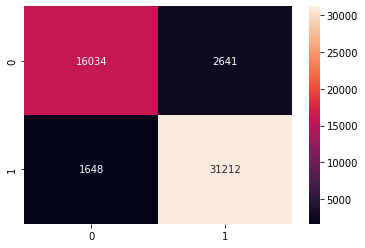

In [75]:
grid_search3 = main(dataframe3,"PCA")

In [76]:
pd.DataFrame(grid_search3.cv_results_).head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_n_estimators,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
0,42.850255,0.233070,0.032658,0.003309,20,{'n_estimators': 20},0.907223,0.906083,0.906010,0.906736,0.906930,0.906597,0.000475,2
1,174.645354,0.742593,0.063174,0.001494,81,{'n_estimators': 81},0.914670,0.914936,0.915543,0.916220,0.915929,0.915460,0.000584,1
2,20.938547,0.333654,0.023914,0.001421,10,{'n_estimators': 10},0.894999,0.899850,0.899680,0.899847,0.897519,0.898379,0.001907,3


In [77]:
df['Accuracy_pca'] =acc1[3]
df['F1_score_pca']=f1[3]

In [78]:
def displayAnalysisGraphs(list1, acc,f1,model):
  plt.scatter(list1,acc)
  for i in range(len(list1)):
    acc[i]=float('{:,.3f}'.format(acc[i]))
    plt.annotate(str(acc[i]), xy=(list1[i], acc[i]))
  plt.ylabel("Accuracy")
  plt.title("Accuracy for dataset after different preprocessing techniques for "+model)
  plt.savefig("Accuracy"+model+".png")
  plt.show()
  plt.scatter(list1,f1)
  for i in range(len(list1)):
    f1[i]=float('{:,.3f}'.format(f1[i]))
    plt.annotate(str(f1[i]), xy=(list1[i], f1[i]))
  plt.ylabel("F1 score")
  plt.title("F1 scores for dataset after different preprocessing techniques for "+model)
  plt.savefig("F1_scores"+model+".png")
  plt.show()

In [79]:
print(f1)
print(acc1)
print(list1)


[0.954616826989039, 0.9540672624575613, 0.9479867045092355, 0.935709681771169]
[0.9422334335888232, 0.9414572620549141, 0.933501503832347, 0.9167750072766081]
['withoutPreprocessing', 'MinMax', 'MinMax_corr', 'PCA']


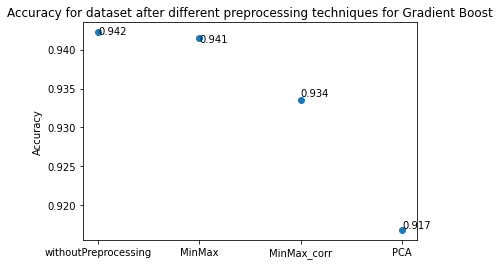

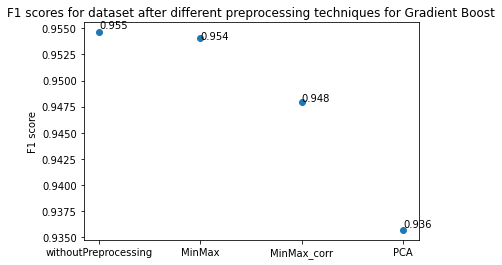

In [80]:
list1 = ['withoutPreprocessing','MinMax','MinMax_corr','PCA']
displayAnalysisGraphs(list1,acc1,f1,"Gradient Boost")

In [81]:
df.to_csv("Gradient_Boost_result.csv")

------------------------------------------------------------